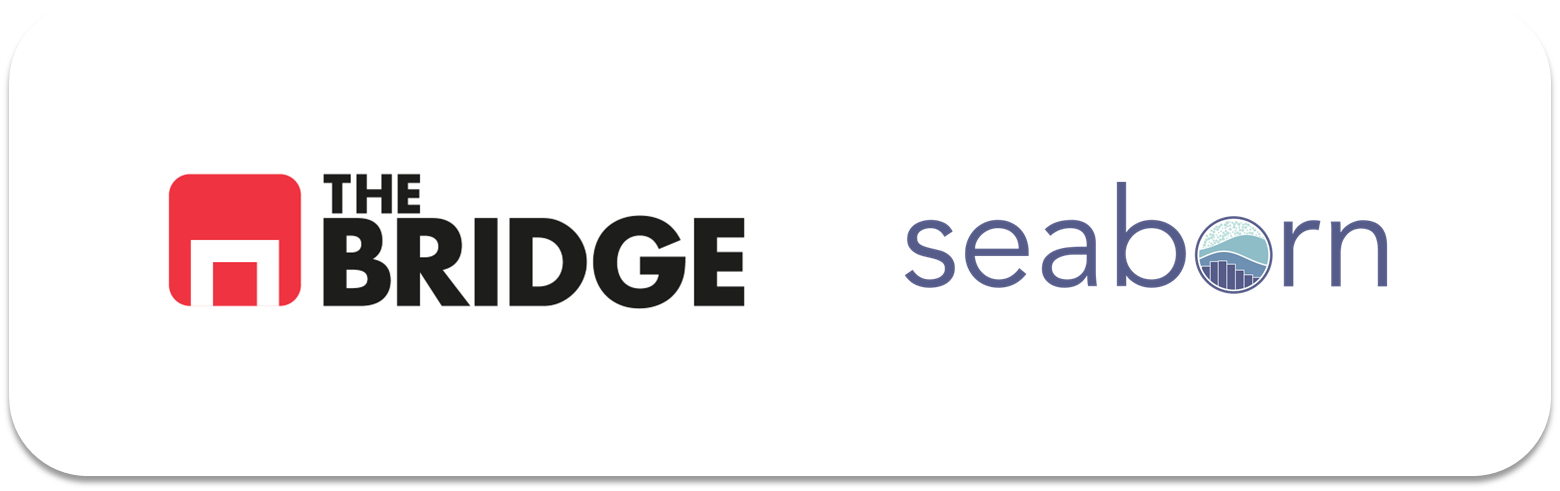

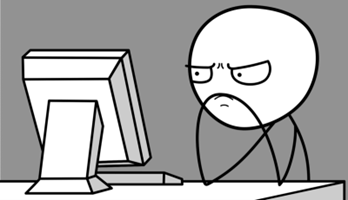

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de variables columnas a la vez, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Viajes, "./data/dataset_viajes_jun23"

In [ ]:
df_titanic = pd.read_csv('./data/titanic.csv')
df_viajes = pd.read_csv('./data/dataset_viajes_jun23.csv')

### Ejercicio 2

Crea una función que tenga como argumentos un dataframe, el nombre de una columa categórica, el nombre de otra columna categórica y que haga lo siguiente:
1. Dibuje una combinación de gráficas con las frecuencias absolutas de cada columna categórica y una figura con el catplot de las dos columnas usando la segunda como valor para el argumento col. Utiliza countplot para las frecuencias y un subplots de 1 fila y dos columnas, añade una figura con catplot para la comparación. 
2. Devuelva la tabla de contigencia de las dos columnas.


In [42]:
def pinta_catplot(df, cat1, cat2):
    fig, axs = plt.subplots(1,2, figsize=(10,5))
    sns.countplot(data = df, x= cat1, ax = axs[0])
    sns.countplot(data = df, x= cat2, ax = axs[1])

    sns.catplot(data = df, x= cat1, col= cat2, kind='bar')

    fig.tight_layout()

### Ejercicio 3

Aplicalo para comparar por un lado "alive" y "who" y "alive" y "class" del dataset del titanic.

#### Alive y who

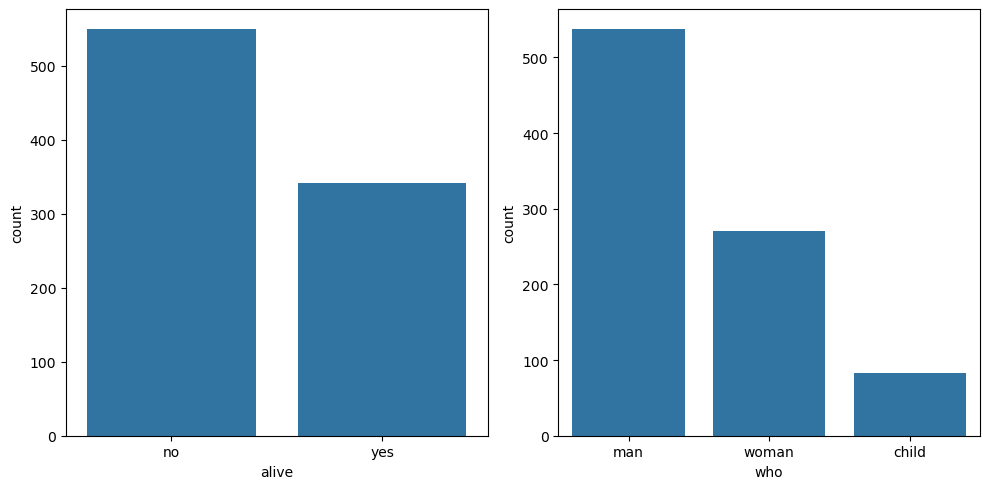

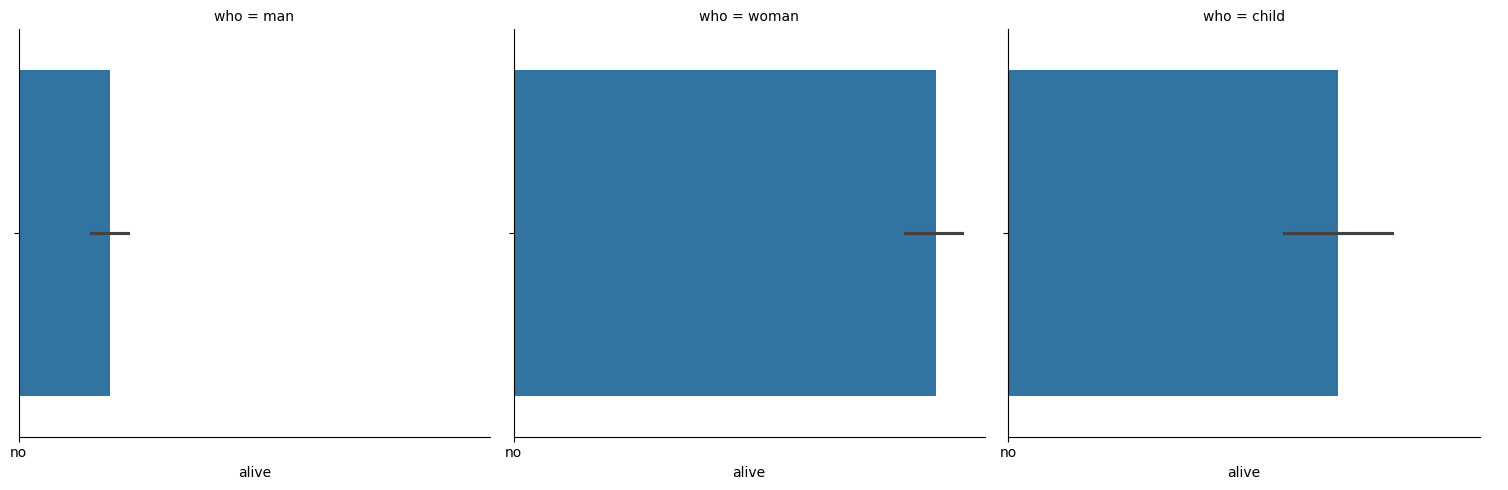

In [43]:
pinta_catplot(df_titanic,'alive','who')

#### Alive y Class

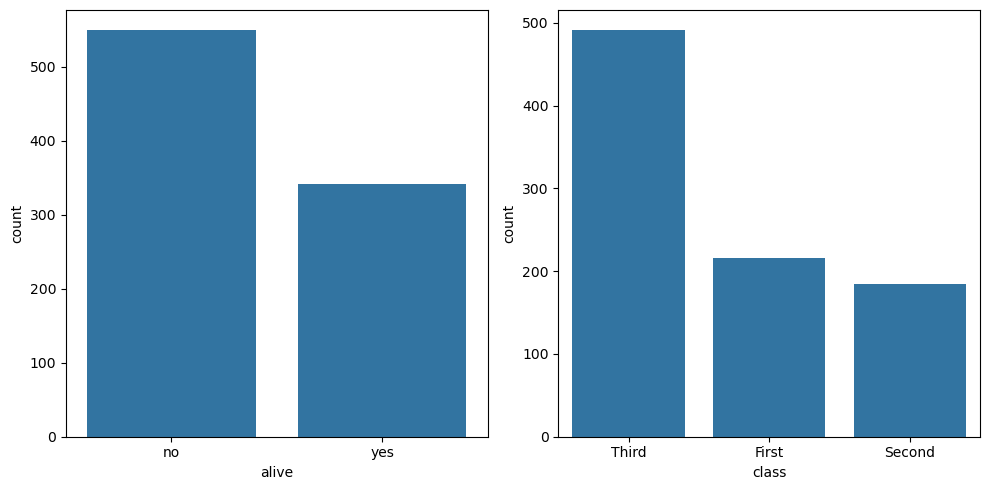

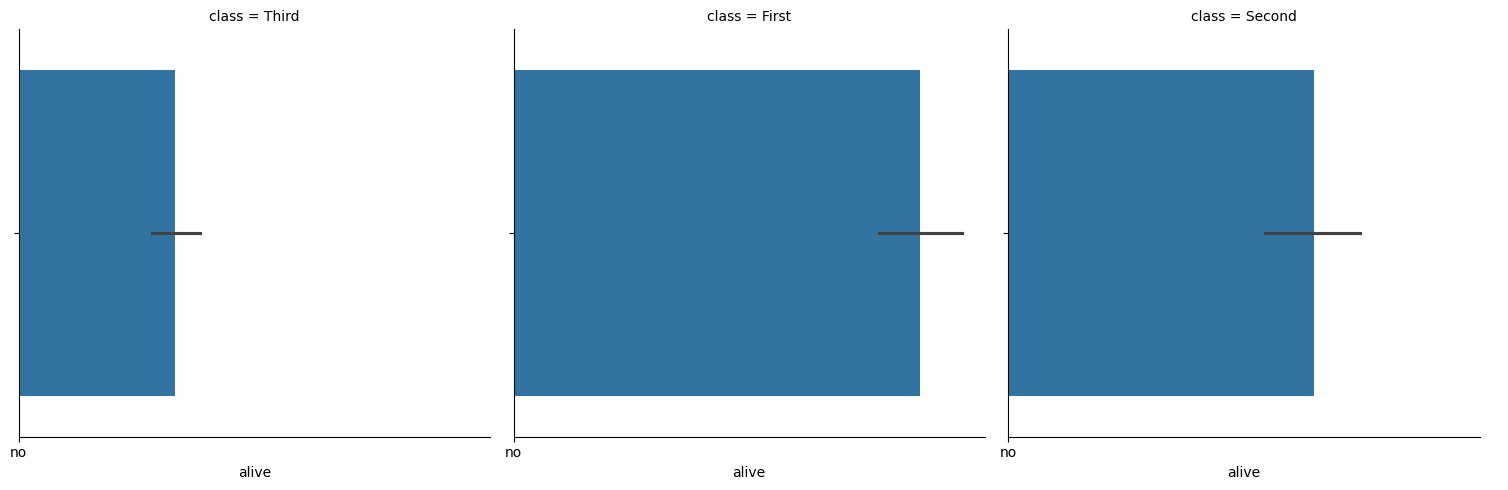

In [39]:
pinta_catplot(df_titanic,'alive','class')

### Ejercicio 4

Crea una función que compare ahora una variable categórica y otra numérica. Para ello, se aconseja reutilizar código de las funciones que viste en el grupo anterior de ejercicios para pintar histogramas, crea una función que haga lo siguiente:
1. Admita tres parámetros o argumentos: Un dataframe, el nombre de una columna categórica del mismo, el nombre de una columna numérica del mismo.
2. Cree una matriz de gráficos, tantas como valores de la variable categórica, con un máximo de tres columnas por fila y todas las filas que necesite.
3. Asigne a cada gráfica el histograma de la variable numérica pero sólo para las filas que tengan el valor que corresponda de la variable categórica (así si el primer valor de la categórica es Val1 y la variable numérica se llama Num1, en la primera gráfica estará el histograma de Num1 sólo para las filas que tengan Val1)
4. Añada el título "Histograma de {variable numerica} para el valor {valor correspondiente de la categórica} a cada gráfica.

In [65]:
def pinta_catnum(df, cat, num, bins = 10, kde = False):
    variables = df[cat].unique()
    fig, axs = plt.subplots(len(variables),1, figsize=(10,20))

    for index, variable in enumerate(variables):
        filtro = df[df[cat] == variable] 
        sns.histplot(data=filtro, x=num, bins=bins, kde=kde, ax=axs[index])
        axs[index].set_title(f'Histograma de {num} para {variable}')
    fig.tight_layout()

### Ejercicio 5

Aplica la función anterior para ver los histogramas de "ingresos" y "consumo_kg" por compañía aérea del dataset de viajes. ¿Qué argumentos añadirías a la función para poder generar mejores visualizaciones?

#### Aircompany e Ingresos

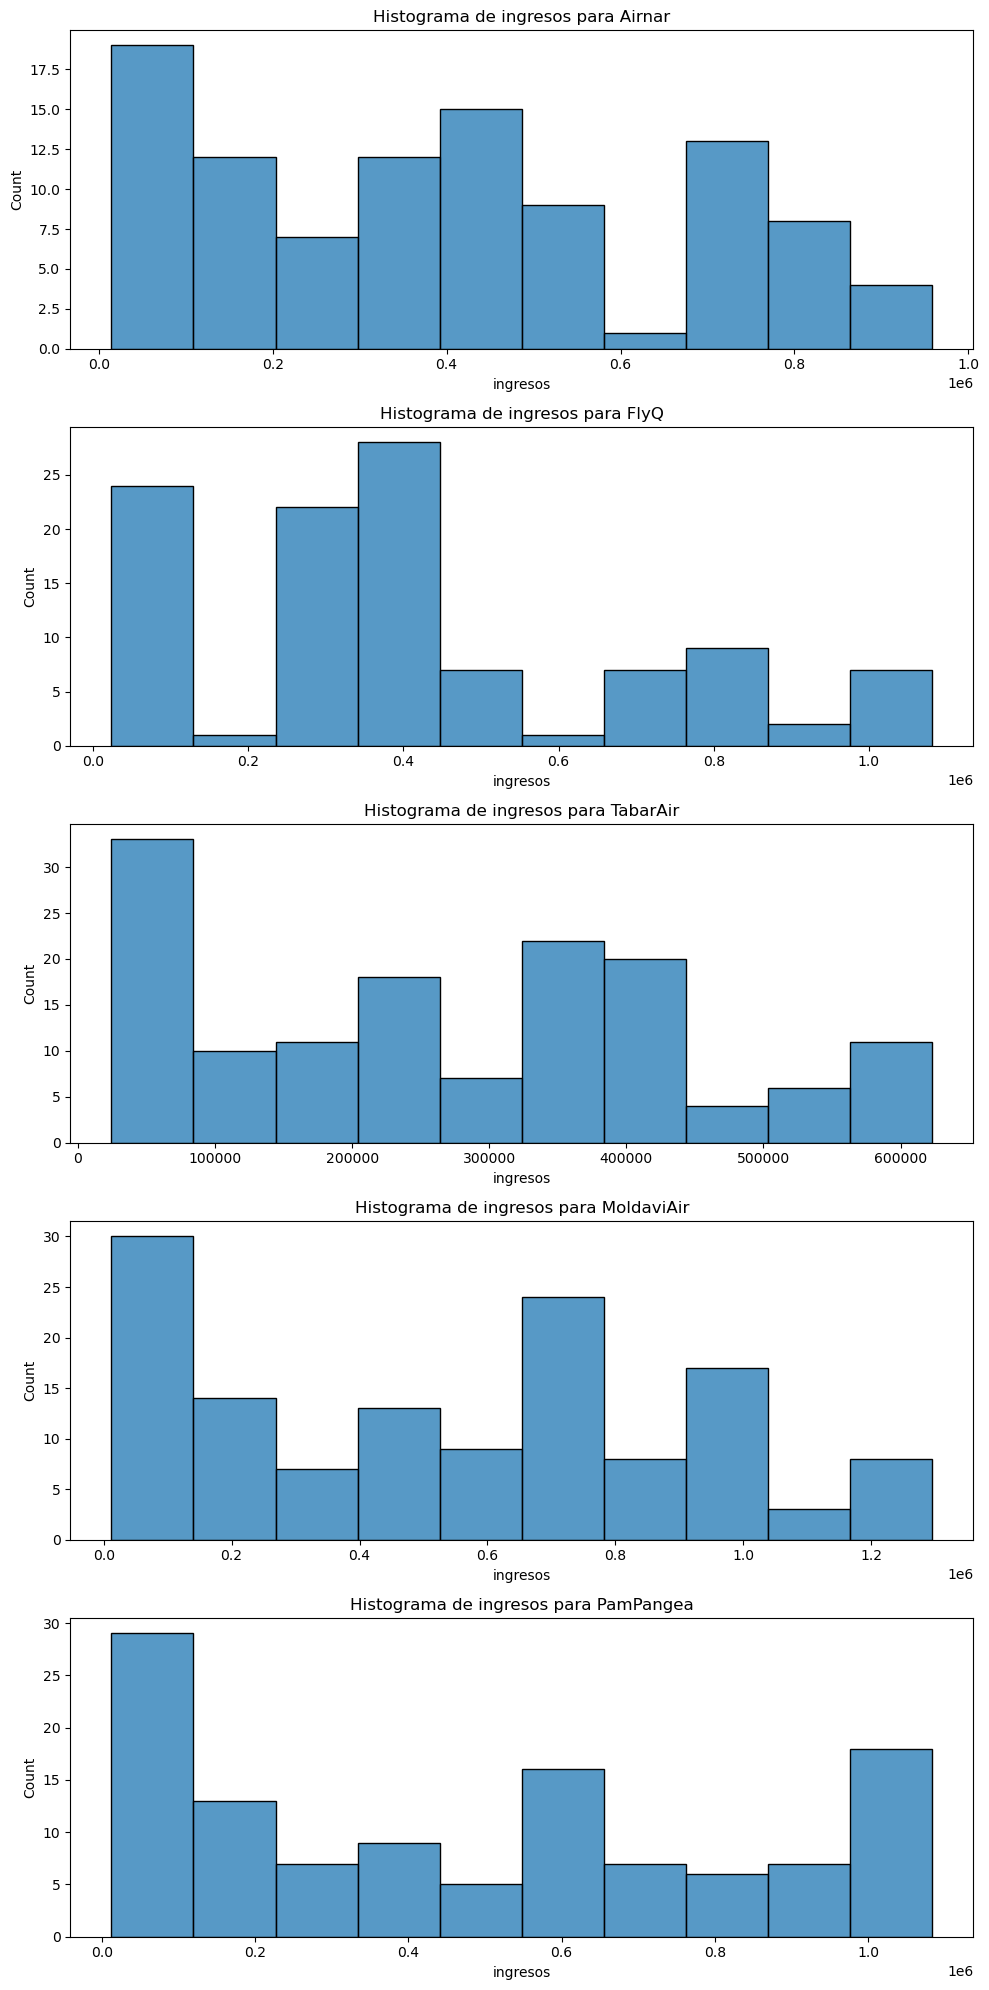

In [66]:
pinta_catnum(df_viajes,'aircompany','ingresos')

#### Aircompany y Consumo_kg

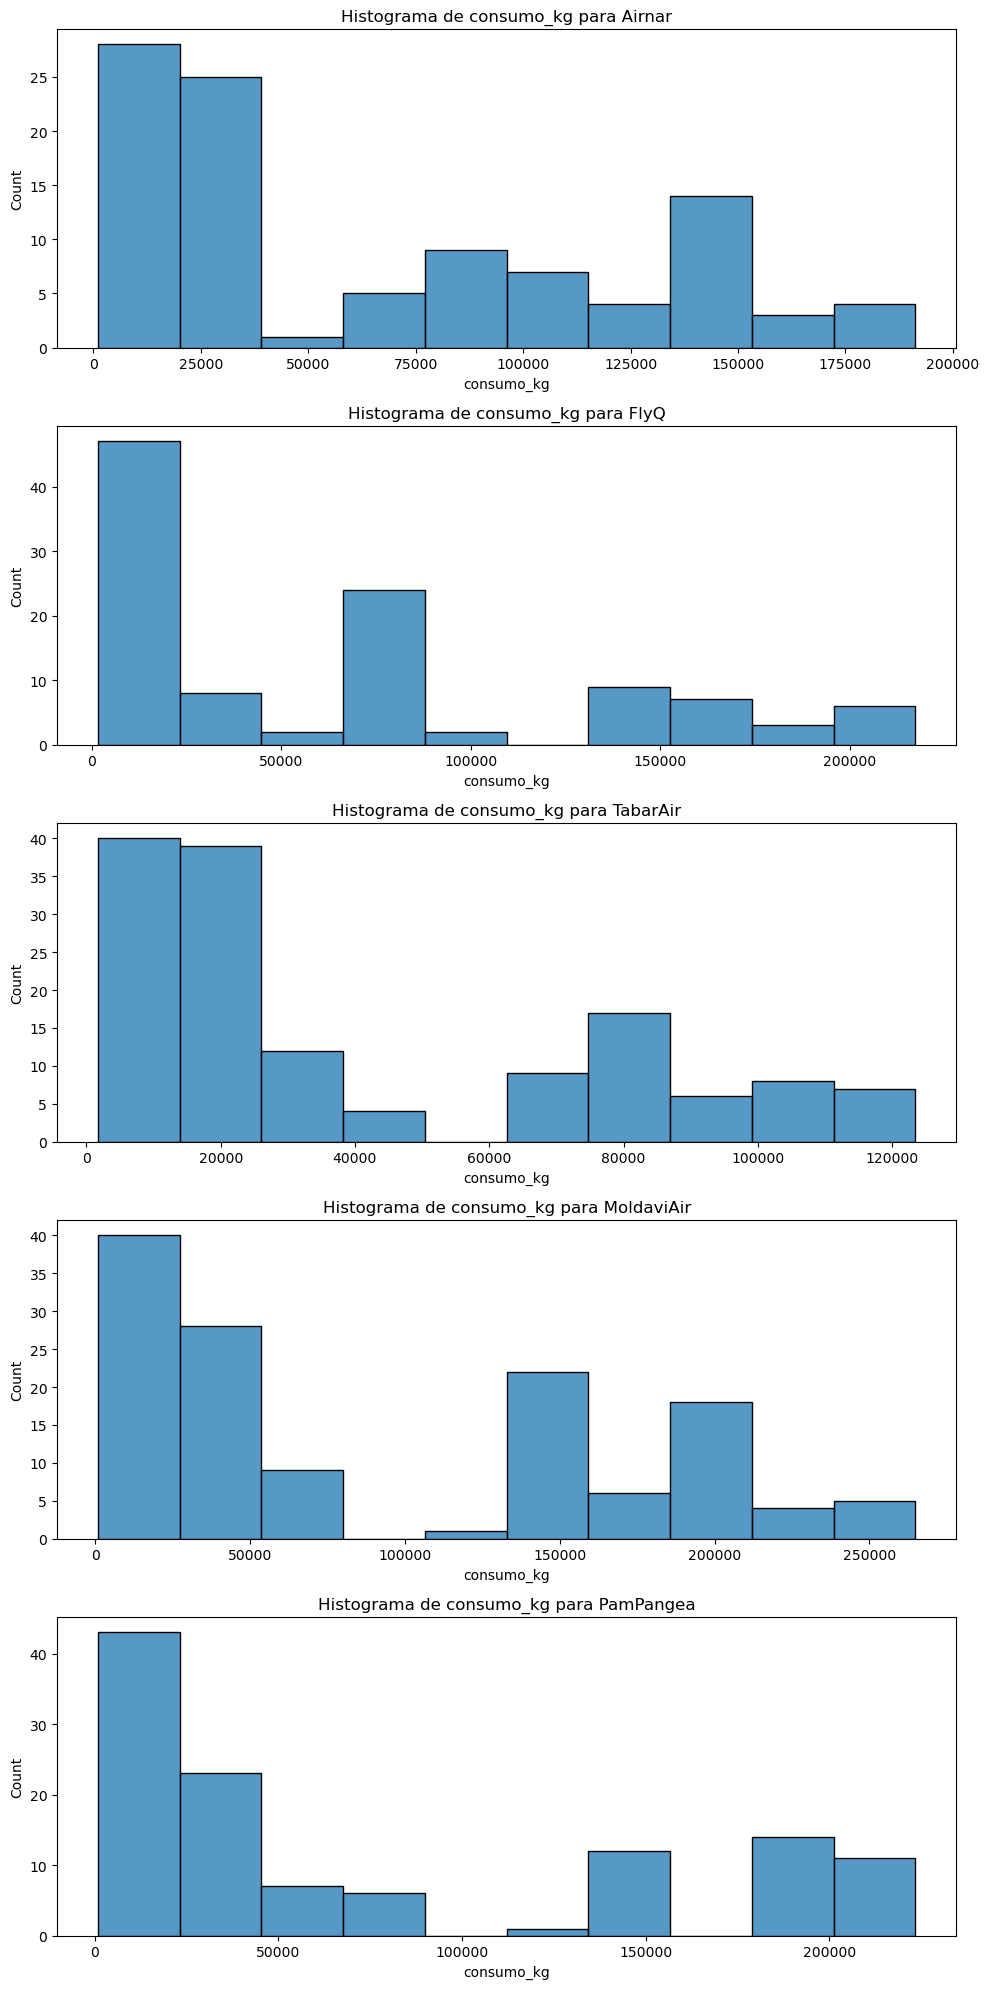

In [67]:
pinta_catnum(df_viajes,'aircompany','consumo_kg')

### Ejercicio 6

Crea una función para pintar diagramas de dispersion que tenga cinco argumentos:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos.

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn que uses. [Nota: como en todos los ejercicios anteriores, debes usar Seaborn para pintar]

In [92]:
df_viajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aircompany  600 non-null    object 
 1   origen      600 non-null    object 
 2   destino     600 non-null    object 
 3   distancia   600 non-null    int64  
 4   avion       600 non-null    object 
 5   con_escala  600 non-null    bool   
 6   consumo_kg  600 non-null    float64
 7   duracion    600 non-null    int64  
 8   ingresos    600 non-null    float64
 9   id_vuelo    600 non-null    object 
 10  mes         600 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 47.6+ KB


In [93]:
def pinta_scater(df, num1, num2, cat = None, size = None):
    sns.scatterplot(df, x=num1, y=num2, hue=cat, size=size)

### Ejercicio 7

Usa la función del ejercicio anterior para pintar la comparativa entre ingresos, consumo_kg y compañía aérea. ¿Si quisieras usarla como visualización que quitarías, añadirías o remarcarías?

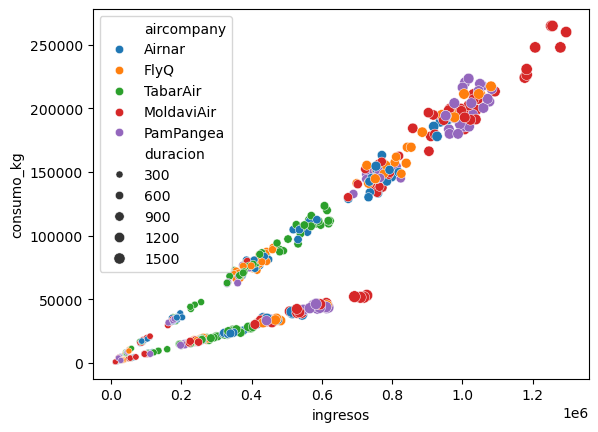

In [96]:
pinta_scater(df_viajes, 'ingresos', 'consumo_kg', 'aircompany', 'duracion')

### Ejercicio 8

Usa la función del ejercicio 6 para pintar la comparativa entre distancia, duración e ingresos. ¿Si quisieras usarla como visualización que quitarías, añadírías o remarcarías?

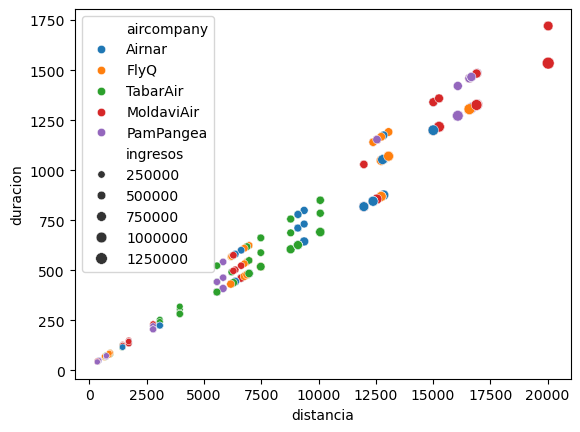

In [97]:
pinta_scater(df_viajes, 'distancia', 'duracion', 'aircompany', 'ingresos')